In [1]:
import numpy as np
import pandas as pd
import sys, os
import essentia.standard as es
import matplotlib.pyplot as plt

# Data loading 

In [2]:
rootdir = '/Users/Morgan/Desktop/UPF/MIR.nosync/Data/mridangam_stroke_1.5'
data_file = os.path.join(rootdir,'data.csv')

In [3]:
StrokeName = ['bheem', 'cha', 'dheem', 'dhin', 'num', 'ta', 'tha', 'tham', 'thi', 'thom']

In [13]:
data = pd.read_csv(data_file)

In [14]:
data.head()

,average_loudness,barkbands_crest.mean,barkbands_crest.stdev,barkbands_flatness_db.mean,barkbands_flatness_db.stdev,barkbands_kurtosis.mean,barkbands_kurtosis.stdev,barkbands_skewness.mean,barkbands_skewness.stdev,barkbands_spread.mean,...,spectral_rolloff.stdev,spectral_skewness.mean,spectral_skewness.stdev,spectral_spread.mean,spectral_spread.stdev,spectral_strongpeak.mean,spectral_strongpeak.stdev,zerocrossingrate.mean,zerocrossingrate.stdev,stroke
0,0.990684,13.866009,5.245748,0.158071,0.058426,14.904247,14.026484,2.626768,1.981326,13.557826,...,4418.911621,2.438945,0.625116,6132703.0,4034072.0,0.327355,0.637478,0.082899,0.108335,num
1,0.990684,14.028541,3.431416,0.313448,0.098723,4.293242,3.016994,0.170873,1.034166,4.955678,...,5744.538574,4.781196,2.154082,6839405.0,12256912.0,0.997291,0.899361,0.073622,0.155820,tha
2,0.990684,18.730339,5.437173,0.391286,0.118905,228.357803,258.135101,9.130470,8.124249,2.778989,...,4155.765625,4.553289,2.418437,6186898.0,7736634.5,0.189275,0.313153,0.009046,0.004425,thom
3,0.990684,12.730183,3.037725,0.220071,0.044533,16.559624,9.841269,2.547109,1.146899,4.563657,...,107.579849,3.351964,0.702329,5364363.5,6893401.0,0.209698,0.179210,0.020215,0.006040,tha
4,0.990684,12.757170,4.137708,0.118156,0.045829,4.055813,7.632864,1.745690,1.137393,50.578865,...,6922.191895,2.121018,0.760510,8732601.0,6219605.5,0.074056,0.257992,0.148977,0.104714,thi


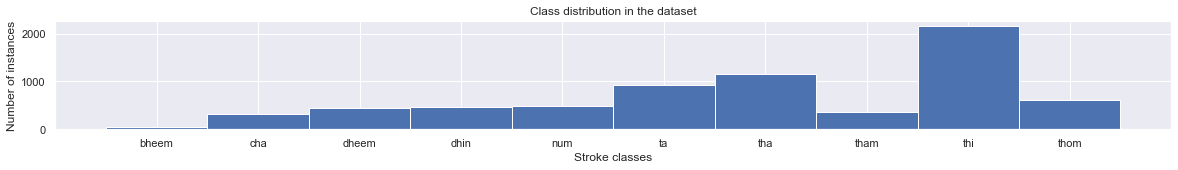

In [15]:
# Plotting the number of instances per class

classes, counts = np.unique(data['stroke'],return_counts=True)
plt.figure(figsize=(20,2))
plt.bar(classes, counts, align='center', width=1)
plt.title('Class distribution in the dataset')
plt.xlabel('Stroke classes')
plt.ylabel('Number of instances')
plt.show()

In [16]:
# Checking if no Nan or null values
data.isnull().sum().sum()

0

# Data visualization 

<AxesSubplot:xlabel='stroke', ylabel='zerocrossingrate.mean'>

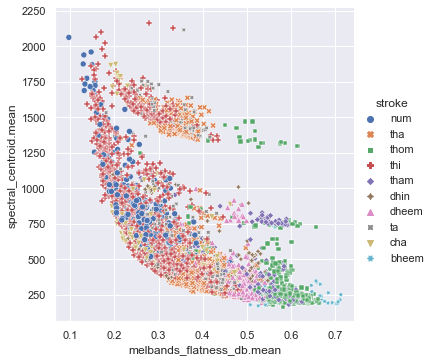

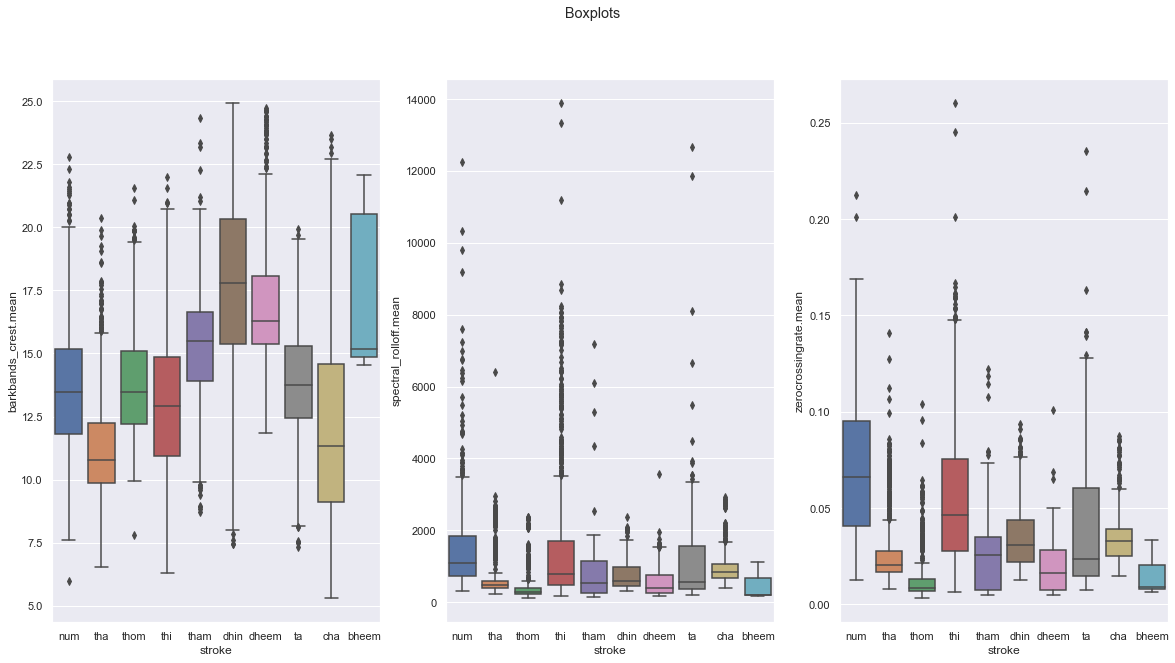

In [17]:
# Plotting a few variables and boxplots

import seaborn as sns

sns.relplot(x = "melbands_flatness_db.mean", y = "spectral_centroid.mean", hue = "stroke", style = "stroke", data = data);


sns.set() 
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

fig.suptitle('Boxplots')


sns.boxplot(x='stroke',y='barkbands_crest.mean',data=data, ax=axes[0])


sns.boxplot(x='stroke',y='spectral_rolloff.mean',data=data, ax=axes[1])


sns.boxplot(x='stroke',y='zerocrossingrate.mean',data=data, ax=axes[2])

In [18]:
# We can see that some features seem to be correlated, which might hold redundant information

#sns.pairplot(data.iloc[:,:-3])

# Experimental Setup 

In this notebook, our goal is to classify the 10 stroke classes using 4 different learning algorithms that rely on different mathematical fundations : 
- Logistic Regression
- Support Vector Machine
- K-Nearest Neighbours
- Random Forest

We also explore two dimensionality reduction (i.e feature selection) techniques and two sampling strategies to address the imbalance problem among the different classes.

We start by splitting our dataset into a training and testing set. For each of the aforementioned methods, we use a 10-fold cross validation setting only using the training set. We finally select the best performing algorithm and train it all over again on the whole training set. We then evaluate it on the test set to assess its performance and see if the obtained results match with the ones we got from the cross validation. 

# Data preprocessing

We first split the data into training and testing sets before applying any transformation (except the label encoding) so that the final sets are not biased by each other : 

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

X = data.iloc[:,:-1]
Y = data.iloc[:,-1]
label_enc = LabelEncoder()
Y = label_enc.fit_transform(Y)

# We stratify according to the labels distribution
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42, stratify=Y)

# Classification with imbalanced data

We assess our four classifiers without solving the class imbalance of our dataset :

F1 weighted scores : LR: 0.891835 (0.014094)
Accuracy scores : LR: 0.863596 (0.020328)
Fit time : LR: 0.492621 (0.037615)
F1 weighted scores : SVM: 0.912121 (0.011835)
Accuracy scores : SVM: 0.893850 (0.019034)
Fit time : SVM: 0.834729 (0.026960)
F1 weighted scores : KNN: 0.873710 (0.023586)
Accuracy scores : KNN: 0.865257 (0.030515)
Fit time : KNN: 0.013019 (0.003441)
F1 weighted scores : RF: 0.937182 (0.011103)
Accuracy scores : RF: 0.928839 (0.016533)
Fit time : RF: 3.542675 (0.152733)


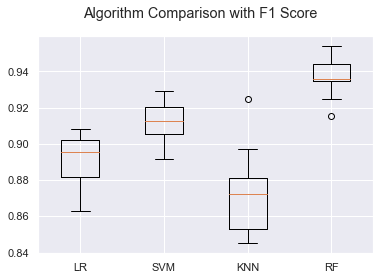

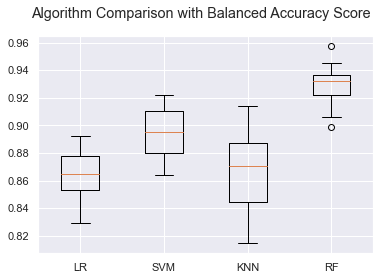

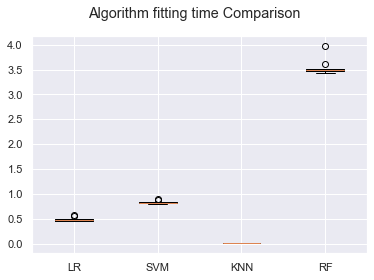

In [20]:
import warnings
warnings.filterwarnings('ignore')
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline


models = []
models.append(('LR', LogisticRegression()))
models.append(('SVM', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier()))


results_f1 = []
results_acc = []
results_time = []
names = []
scoring = ['f1_weighted','balanced_accuracy']

i = 0
for name, model in models:
    scaler = MinMaxScaler()
    pipe = Pipeline(steps=[('scaler', scaler), (name, model)])
    kfold = model_selection.KFold(n_splits=10, random_state=i, shuffle=True)
    cv_results = model_selection.cross_validate(pipe, X_train, Y_train, cv=kfold, scoring=scoring)
    results_f1.append(cv_results['test_f1_weighted'])
    results_acc.append(cv_results['test_balanced_accuracy'])
    results_time.append(cv_results['fit_time'])
    names.append(name)
    i+=1

    
    msg1 = "%s: %f (%f)" % (name, cv_results['test_f1_weighted'].mean(), cv_results['test_f1_weighted'].std())
    print('F1 weighted scores :',msg1)
    msg2 = "%s: %f (%f)" % (name, cv_results['test_balanced_accuracy'].mean(), cv_results['test_balanced_accuracy'].std())
    print('Accuracy scores :',msg2)
    msg3 = "%s: %f (%f)" % (name, cv_results['fit_time'].mean(), cv_results['fit_time'].std())
    print('Fit time :',msg3)
    

    
fig = plt.figure()
fig.suptitle('Algorithm Comparison with F1 Score')
ax = fig.add_subplot(111)
plt.boxplot(results_f1)
ax.set_xticklabels(names)
plt.show()


    
fig = plt.figure()
fig.suptitle('Algorithm Comparison with Balanced Accuracy Score')
ax = fig.add_subplot(111)
plt.boxplot(results_acc)
ax.set_xticklabels(names)
plt.show()


fig = plt.figure()
fig.suptitle('Algorithm fitting time Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_time)
ax.set_xticklabels(names)
plt.show()

We see that the Random Forest classifier achieves the best performance. We train this model from scratch on the whole training set and evaluate it on the test set we built at the beginning : 

In [21]:
from sklearn.metrics import classification_report


print('Number of training examples : ', len(X_train))
print('Number of testing examples : ', len(X_test),'\n\n')

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier()

rf.fit(X_train_scaled, Y_train)
pred = rf.predict(X_test_scaled)

print(classification_report(Y_test, pred))

Number of training examples :  5232
Number of testing examples :  1745 


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.97      0.86      0.91        80
           2       0.91      0.94      0.92       112
           3       0.91      0.91      0.91       117
           4       0.98      0.94      0.96       121
           5       0.95      0.87      0.90       231
           6       0.96      1.00      0.98       288
           7       0.93      0.73      0.82        89
           8       0.91      0.98      0.94       541
           9       0.98      0.97      0.98       154

    accuracy                           0.94      1745
   macro avg       0.95      0.92      0.93      1745
weighted avg       0.94      0.94      0.94      1745




 Global accuracy : 0.9381088825214899


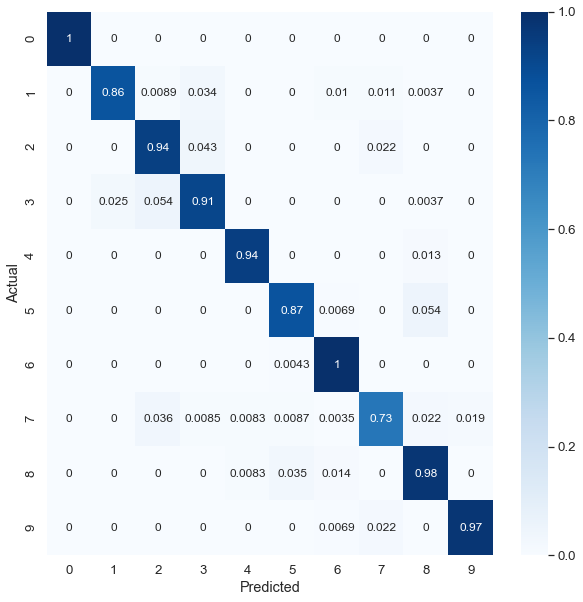

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

classes = np.unique(np.unique(Y_test))
conf_mat = pd.DataFrame(confusion_matrix(Y_test, pred), columns = classes, index = classes)
conf_mat.index.name = 'Actual'
conf_mat.columns.name = 'Predicted'
conf_mat/=np.sum(conf_mat,axis=1)
plt.figure(figsize = (10, 10))
sns.set(font_scale = 1.2)
sns.heatmap(conf_mat, cmap = "Blues", annot_kws = {"size": 12}, annot = True);

print('\n Global accuracy :', np.mean(Y_test==pred))

Even though our classes are not equally distributed, the classifier seems to work pretty well on our dataset with a global accuracy of 94% on training set and 94% on the test set (results may vary when executing again). From the confusion matrix, we can see that the class n°7 is the least recognized.

## Feature selection


We will try to select the most relevant features for our classification by using two methods : ANOVA tests and principal component analysis


#### 1) Anova

We first use ANOVA tests because we want to measure the influence of our features on our target labels. In other words, we want to see whether the mean difference for a particular feature across classes is significant or not. If it is, then we can assume that this feature has some kind of influence on the corresponding label. Otherwise, we can discard it. Here, we arbitrarily choose a number of 20 features that will be kept.

In [23]:
from sklearn.feature_selection import SelectKBest, f_classif

F1 weighted scores : LR: 0.780513 (0.010226)
Accuracy scores : LR: 0.697373 (0.021013)
Fit time : LR: 0.363161 (0.059601)
F1 weighted scores : SVM: 0.879453 (0.007913)
Accuracy scores : SVM: 0.853459 (0.012954)
Fit time : SVM: 0.540239 (0.022591)
F1 weighted scores : KNN: 0.876251 (0.015872)
Accuracy scores : KNN: 0.857703 (0.022855)
Fit time : KNN: 0.031667 (0.012886)
F1 weighted scores : RF: 0.913577 (0.011333)
Accuracy scores : RF: 0.895359 (0.018509)
Fit time : RF: 1.912102 (0.172639)


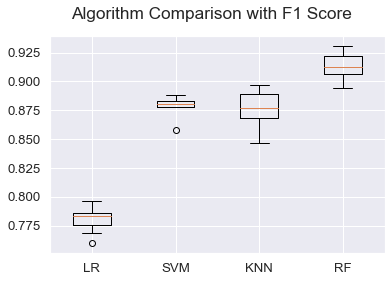

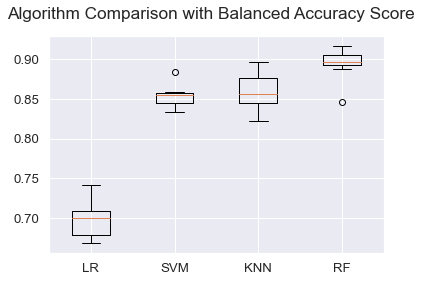

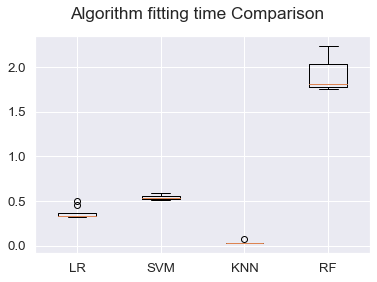

In [25]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('SVM', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier()))



results_f1 = []
results_acc = []
results_time = []
names = []
scoring = ['f1_weighted','balanced_accuracy']

i = 0
for name, model in models:
    scaler = MinMaxScaler()
    selection = SelectKBest(f_classif, k=20)
    pipe = Pipeline(steps=[('scaler', scaler), ('feature_selection', selection), (name, model)])
    kfold = model_selection.KFold(n_splits=10, random_state=i, shuffle=True)
    cv_results = model_selection.cross_validate(pipe, X_train, Y_train, cv=kfold, scoring=scoring)
    results_f1.append(cv_results['test_f1_weighted'])
    results_acc.append(cv_results['test_balanced_accuracy'])
    results_time.append(cv_results['fit_time'])
    names.append(name)
    i+=1

    
    msg1 = "%s: %f (%f)" % (name, cv_results['test_f1_weighted'].mean(), cv_results['test_f1_weighted'].std())
    print('F1 weighted scores :',msg1)
    msg2 = "%s: %f (%f)" % (name, cv_results['test_balanced_accuracy'].mean(), cv_results['test_balanced_accuracy'].std())
    print('Accuracy scores :',msg2)
    msg3 = "%s: %f (%f)" % (name, cv_results['fit_time'].mean(), cv_results['fit_time'].std())
    print('Fit time :',msg3)
    

    
fig = plt.figure()
fig.suptitle('Algorithm Comparison with F1 Score')
ax = fig.add_subplot(111)
plt.boxplot(results_f1)
ax.set_xticklabels(names)
plt.show()


    
fig = plt.figure()
fig.suptitle('Algorithm Comparison with Balanced Accuracy Score')
ax = fig.add_subplot(111)
plt.boxplot(results_acc)
ax.set_xticklabels(names)
plt.show()


fig = plt.figure()
fig.suptitle('Algorithm fitting time Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_time)
ax.set_xticklabels(names)
plt.show()

We can see from the results above that discarding some features has degraded the overall performance of the different classifiers. This is especially the case for the logistic regression model. One way to explain this result is to assume that all features are somehow relevant in a regression setting. For example with a linear regression, the r2 coefficient automatically decreases if a feature is discarded, even though it was highly correlated to others or not. 

For the random forest classifier, the slight difference in performance is due to the inherent principle of the algorithm, which builds its trees starting with the most relevant features. Therefore, our feature selection step acts as a prunning process where we cut out last branches of the trees that carry redundant or irrelevant information regarding the target variable. 

For the other models (SVM and KNN), we simply assume that selecting only the 20 most relevant features automatically discards complementary information contained in the data. 

Finally, the overall training time is greatly reduced for most classifiers, as they have less information to process.

We now apply the same pipeline to the whole training set, we plot the names of the features selected and plot their inter-relationships. We then evaluate the best model from the cross-validation step : the random forest classifier. 

In [27]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

selection = SelectKBest(f_classif, k=20).fit(X_train_scaled, Y_train)
feature_indexes = selection.get_support(indices=True)

print('Selected features :\n', list(data.columns[feature_indexes]))


# The function pairplot takes too long to run, but here, the selected features are highly correlated!


#df = pd.DataFrame(data, columns= list(data.columns[feature_indexes])+['stroke'])
#sns.pairplot(df, hue="stroke")

Selected features :
 ['barkbands_flatness_db.mean', 'barkbands_flatness_db.stdev', 'dissonance.mean', 'erbbands_flatness_db.mean', 'melbands_crest.mean', 'melbands_flatness_db.mean', 'melbands_flatness_db.stdev', 'pitch_salience.mean', 'spectral_complexity.mean', 'spectral_complexity.stdev', 'spectral_energyband_high.mean', 'spectral_energyband_high.stdev', 'spectral_energyband_low.mean', 'spectral_energyband_low.stdev', 'spectral_energyband_middle_high.mean', 'spectral_entropy.mean', 'spectral_kurtosis.mean', 'spectral_kurtosis.stdev', 'spectral_skewness.mean', 'spectral_skewness.stdev']


We see that these features are more or less correlated. This is due to the fact that the ANOVA test is carried out to measure the influence of a feature on the target variable, and ignores its possible relationships with other features. In some cases, this correlation among features can be problematic. For example, in a regression setting, multicolinearity might affect the variance of the coefficients which can reduce the interpretability of the model.

In [28]:
print('Number of training examples : ', len(X_train))
print('Number of testing examples : ', len(X_test),'\n\n')

X_train_reduced = X_train_scaled[:,feature_indexes]
X_test_reduced = X_test_scaled[:,feature_indexes]

rf = RandomForestClassifier()

rf.fit(X_train_reduced, Y_train)
pred = rf.predict(X_test_reduced)

print(classification_report(Y_test, pred))

Number of training examples :  5232
Number of testing examples :  1745 


              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.88      0.85      0.87        80
           2       0.84      0.88      0.86       112
           3       0.83      0.80      0.82       117
           4       0.95      0.95      0.95       121
           5       0.95      0.88      0.92       231
           6       0.96      0.98      0.97       288
           7       0.91      0.65      0.76        89
           8       0.91      0.97      0.94       541
           9       0.95      0.96      0.96       154

    accuracy                           0.92      1745
   macro avg       0.92      0.88      0.90      1745
weighted avg       0.92      0.92      0.92      1745



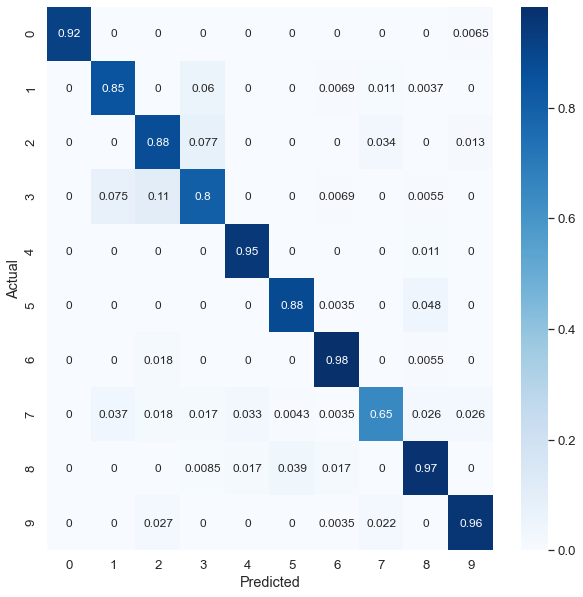

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

classes = np.unique(np.unique(Y_test))
conf_mat = pd.DataFrame(confusion_matrix(Y_test, pred), columns = classes, index = classes)
conf_mat.index.name = 'Actual'
conf_mat.columns.name = 'Predicted'
conf_mat/=np.sum(conf_mat,axis=1)
plt.figure(figsize = (10, 10))
sns.set(font_scale = 1.2)
sns.heatmap(conf_mat, cmap = "Blues", annot_kws = {"size": 12}, annot = True);

We conclude that this feature selection method slightly degrades the results while improving the computational efficiency of most of the implemented classifiers. 

#### 2) PCA

With the PCA, we project our data onto a subspace that maximizes its intra-variance without taking the label information into account. This time, we will get rid of any multicolinearity within our data to only keep the directions that best explain the distribution of the data.

F1 weighted scores : LR: 0.827728 (0.018234)
Accuracy scores : LR: 0.771016 (0.029054)
Fit time : LR: 0.435501 (0.101414)
F1 weighted scores : SVM: 0.908542 (0.011883)
Accuracy scores : SVM: 0.892401 (0.016271)
Fit time : SVM: 0.673932 (0.096303)
F1 weighted scores : KNN: 0.859735 (0.023773)
Accuracy scores : KNN: 0.844271 (0.030519)
Fit time : KNN: 0.064540 (0.006669)
F1 weighted scores : RF: 0.867915 (0.010117)
Accuracy scores : RF: 0.836018 (0.032238)
Fit time : RF: 2.225769 (0.252155)


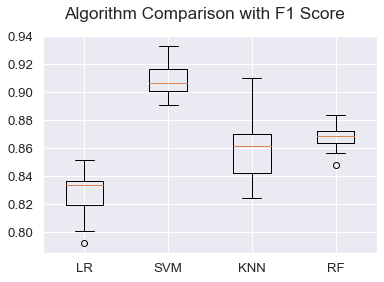

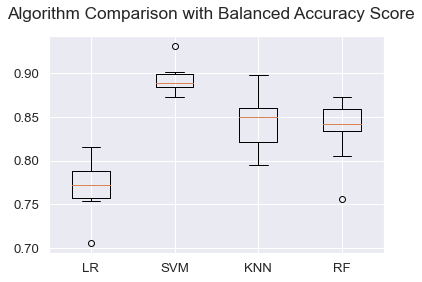

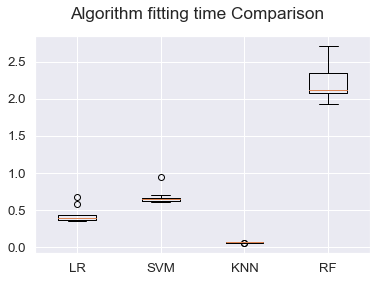

In [30]:
from sklearn.decomposition import PCA


models = []
models.append(('LR', LogisticRegression()))
models.append(('SVM', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier()))


results_f1 = []
results_acc = []
results_time = []
names = []
scoring = ['f1_weighted','balanced_accuracy']

i = 0
for name, model in models:
    scaler = MinMaxScaler()
    pca = PCA(n_components=20)
    pipe = Pipeline(steps=[('scaler', scaler), ('PCA', pca), (name, model)])
    kfold = model_selection.KFold(n_splits=10, random_state=i, shuffle=True)
    cv_results = model_selection.cross_validate(pipe, X_train, Y_train, cv=kfold, scoring=scoring)
    results_f1.append(cv_results['test_f1_weighted'])
    results_acc.append(cv_results['test_balanced_accuracy'])
    results_time.append(cv_results['fit_time'])
    names.append(name)
    i+=1

    
    msg1 = "%s: %f (%f)" % (name, cv_results['test_f1_weighted'].mean(), cv_results['test_f1_weighted'].std())
    print('F1 weighted scores :',msg1)
    msg2 = "%s: %f (%f)" % (name, cv_results['test_balanced_accuracy'].mean(), cv_results['test_balanced_accuracy'].std())
    print('Accuracy scores :',msg2)
    msg3 = "%s: %f (%f)" % (name, cv_results['fit_time'].mean(), cv_results['fit_time'].std())
    print('Fit time :',msg3)
    

    
fig = plt.figure()
fig.suptitle('Algorithm Comparison with F1 Score')
ax = fig.add_subplot(111)
plt.boxplot(results_f1)
ax.set_xticklabels(names)
plt.show()


    
fig = plt.figure()
fig.suptitle('Algorithm Comparison with Balanced Accuracy Score')
ax = fig.add_subplot(111)
plt.boxplot(results_acc)
ax.set_xticklabels(names)
plt.show()


fig = plt.figure()
fig.suptitle('Algorithm fitting time Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_time)
ax.set_xticklabels(names)
plt.show()

We can see from the results displayed above that the PCA has had mixed results depending on the nature of the classifier (while overall, reducing the fitting time for most of them) : 

- For the regression model, we can see that the variance explained by the 20 selected principal components holds valuable information about the data. Compared to the previous feature selection method, there is a significant improvement in performance. However, discarding variables is still penalizing this model, as it does not perform as well as when it is given all the different features contained in the dataset. 

- For the SVM-based classifier, the performance seems to be the same after applying PCA. The features extracted by this methods seem to be the one that are the most useful regarding the decision boundary (margin) construction. 

- For the KNN algorithm, there seems to be a slight improvement compared to the ANOVA-based method, however, it is hard to assert whether it is significant or not. 

- For the Random Forest classifier, the performance seems to significantly decrease. This might be due to the fact that the criterion used to build trees are not based on the overall variance of the data, but on the amount of knowledge gained about the target variable when knowing the value of a given feature. Therefore, it may have lost some information when we selected the 20 first principal components. 

In [32]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


pca = PCA(n_components=20)

pca.fit(X_train_scaled)

X_train_transformed = pca.transform(X_train_scaled)
X_test_transformed = pca.transform(X_test_scaled)

# We plot the selected features : 

size = X_train_transformed.shape[1]
df = pd.DataFrame(np.c_[X_train_transformed], columns= [str(int) for int in np.arange(size)])

# Paiplot takes too long to run, but here the features are not correlated at all!

#sns.pairplot(df)

We can see here that the 20 selected features built the PCA are not correlated, which implies that redundant information previously present in the data has been discarded. 

In [33]:
from sklearn.metrics import classification_report
print('Number of training examples : ', len(X_train_transformed))
print('Number of testing examples : ', len(X_test_transformed),'\n\n')

svm = SVC()

svm.fit(X_train_transformed, Y_train)
pred = svm.predict(X_test_transformed)

print(classification_report(Y_test, pred))

Number of training examples :  5232
Number of testing examples :  1745 


              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.88      0.79      0.83        80
           2       0.82      0.92      0.87       112
           3       0.91      0.85      0.88       117
           4       0.95      0.79      0.86       121
           5       0.94      0.81      0.87       231
           6       0.97      0.99      0.98       288
           7       0.82      0.76      0.79        89
           8       0.87      0.97      0.92       541
           9       0.97      0.96      0.97       154

    accuracy                           0.91      1745
   macro avg       0.91      0.88      0.89      1745
weighted avg       0.91      0.91      0.91      1745



Results from the validation on the test set match with the ones obtained from the cross validation which supports the robustness of our partitioning strategy. 

# Classification with balanced data

In this section, we will try to adress the imbalance among classes we have in our dataset. For this, we will consider two techniques : Over-sampling and a combination of over-sampling and down-sampling. 

#### 1) Over-sampling 

Synthetic Minority Oversampling Technique (SMOTE) is data augmentation method for minority classes in the context of an imbalanced classification. It selects elements from the minority classes that are close to each other in the feature space. It then draws a line between these elements on which a new example is synthetized (as a convex combination of the two elements). In our cross-validation setting, all the minority classes will be up-sampled to reach the same number of instances as the majority class. 

In [34]:
import imblearn

F1 weighted scores : LR: 0.911979 (0.013638)
Accuracy scores : LR: 0.917536 (0.013749)
Fit time : LR: 1.525631 (0.203099)
F1 weighted scores : SVM: 0.933371 (0.010348)
Accuracy scores : SVM: 0.939197 (0.012432)
Fit time : SVM: 4.034961 (0.462554)
F1 weighted scores : KNN: 0.860790 (0.015462)
Accuracy scores : KNN: 0.887977 (0.019539)
Fit time : KNN: 0.117809 (0.042667)
F1 weighted scores : RF: 0.944625 (0.008741)
Accuracy scores : RF: 0.941643 (0.011700)
Fit time : RF: 12.532127 (1.036324)


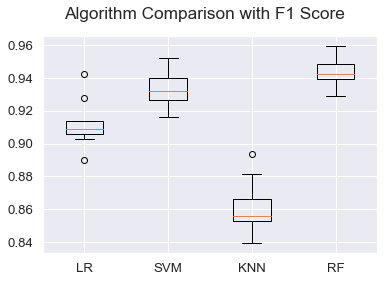

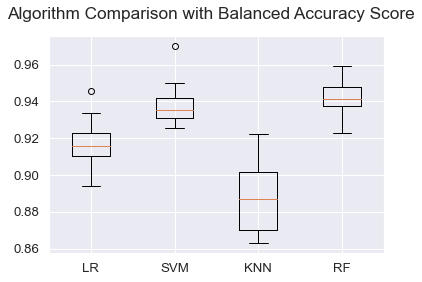

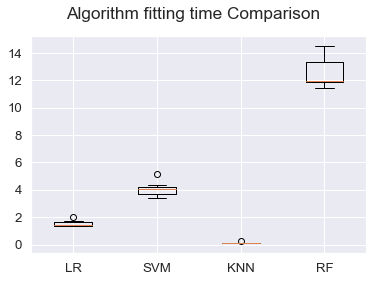

In [35]:
from imblearn.over_sampling import SMOTE


models = []
models.append(('LR', LogisticRegression()))
models.append(('SVM', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier()))


results_f1 = []
results_acc = []
results_time = []
names = []
scoring = ['f1_weighted','balanced_accuracy']


i = 0
for name, model in models:
    scaler = MinMaxScaler()
    oversample = SMOTE()
    pipe = imblearn.pipeline.Pipeline(steps=[('scaler', scaler), ('Sampling', oversample), (name, model)])
    kfold = model_selection.KFold(n_splits=10, random_state=i, shuffle=True)
    cv_results = model_selection.cross_validate(pipe, X_train, Y_train, cv=kfold, scoring=scoring)
    results_f1.append(cv_results['test_f1_weighted'])
    results_acc.append(cv_results['test_balanced_accuracy'])
    results_time.append(cv_results['fit_time'])
    names.append(name)
    i+=1

    
    msg1 = "%s: %f (%f)" % (name, cv_results['test_f1_weighted'].mean(), cv_results['test_f1_weighted'].std())
    print('F1 weighted scores :',msg1)
    msg2 = "%s: %f (%f)" % (name, cv_results['test_balanced_accuracy'].mean(), cv_results['test_balanced_accuracy'].std())
    print('Accuracy scores :',msg2)
    msg3 = "%s: %f (%f)" % (name, cv_results['fit_time'].mean(), cv_results['fit_time'].std())
    print('Fit time :',msg3)
    

    
fig = plt.figure()
fig.suptitle('Algorithm Comparison with F1 Score')
ax = fig.add_subplot(111)
plt.boxplot(results_f1)
ax.set_xticklabels(names)
plt.show()


    
fig = plt.figure()
fig.suptitle('Algorithm Comparison with Balanced Accuracy Score')
ax = fig.add_subplot(111)
plt.boxplot(results_acc)
ax.set_xticklabels(names)
plt.show()


fig = plt.figure()
fig.suptitle('Algorithm fitting time Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_time)
ax.set_xticklabels(names)
plt.show()

We can see here that upsampling minority classes strongly improves our classifiers performance. However, an exception is made for the KNN algorithm, of which the performance is not that affected because the SMOTE method is actually similar to the functioning of KNN (it directly operates within the feature space). Which means that synthetized instances will not change the decision function of this specific algorithm. However, the training time for all algorithms drastically increases as more data is processed. 


We now apply the same pipeline to the whole training set. This time we will validate both the random forest classifier and the SVM on the test :

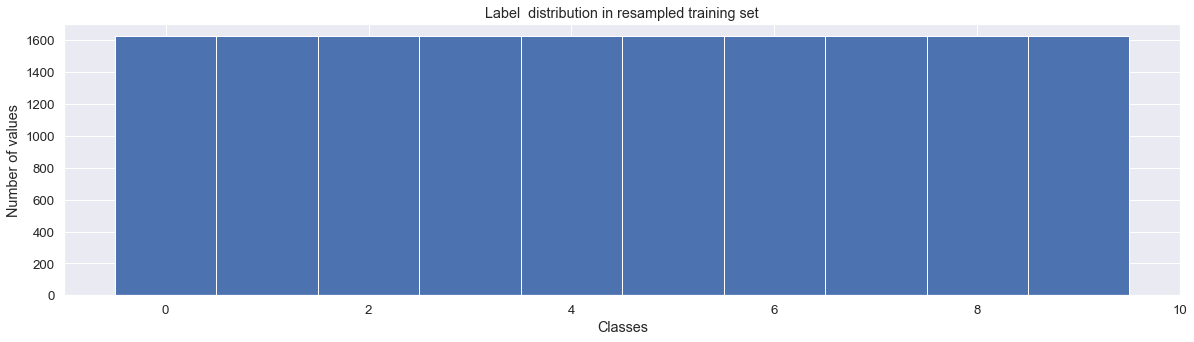

In [38]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

oversample = SMOTE()
X_train_over, Y_train_over = oversample.fit_resample(X_train_scaled, Y_train)

classes, counts = np.unique(Y_train_over, return_counts=True)

plt.figure(figsize=(20,5))
plt.title('Label  distribution in resampled training set')
plt.bar(classes, counts, align='center', width=1)
plt.xlabel('Classes')
plt.ylabel('Number of values')
plt.show()

Number of training examples :  16230
Number of testing examples :  1745 


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.96      0.91      0.94        80
           2       0.93      0.97      0.95       112
           3       0.98      0.95      0.97       117
           4       0.97      0.97      0.97       121
           5       0.93      0.90      0.92       231
           6       0.96      1.00      0.98       288
           7       0.94      0.83      0.88        89
           8       0.94      0.96      0.95       541
           9       0.99      0.98      0.99       154

    accuracy                           0.95      1745
   macro avg       0.96      0.95      0.95      1745
weighted avg       0.95      0.95      0.95      1745

Overall acurracy : 0.9535816618911175


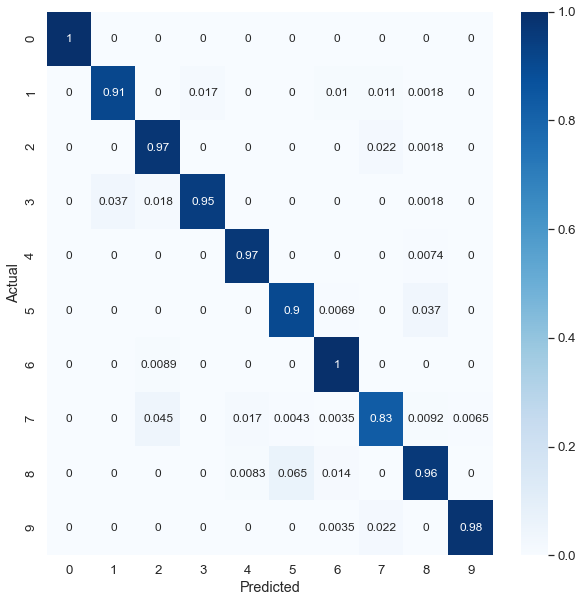

In [39]:
print('Number of training examples : ', len(X_train_over))
print('Number of testing examples : ', len(X_test),'\n\n')

rf = RandomForestClassifier()

rf.fit(X_train_over, Y_train_over)
pred = rf.predict(X_test_scaled)

print(classification_report(Y_test, pred))
print('Overall acurracy :', np.mean(Y_test==pred))

classes = np.unique(np.unique(Y_test))
conf_mat = pd.DataFrame(confusion_matrix(Y_test, pred), columns = classes, index = classes)
conf_mat.index.name = 'Actual'
conf_mat.columns.name = 'Predicted'

conf_mat/=np.sum(conf_mat,axis=1)
plt.figure(figsize = (10, 10))
sns.set(font_scale = 1.2)
sns.heatmap(conf_mat, cmap = "Blues", annot_kws = {"size": 12}, annot = True);

From this validation on our test set, we can see that upsampling the minority classes consisently improves the performance of the random forest classifier, with still the class n°7 being the least recognized. 

Number of training examples :  16230
Number of testing examples :  1745 


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      0.96      0.94        80
           2       0.90      0.97      0.94       112
           3       1.00      0.93      0.96       117
           4       0.95      0.96      0.95       121
           5       0.89      0.88      0.89       231
           6       0.98      0.98      0.98       288
           7       0.88      0.90      0.89        89
           8       0.94      0.94      0.94       541
           9       0.99      0.97      0.98       154

    accuracy                           0.94      1745
   macro avg       0.95      0.95      0.95      1745
weighted avg       0.94      0.94      0.94      1745

Overall acurracy : 0.9438395415472779


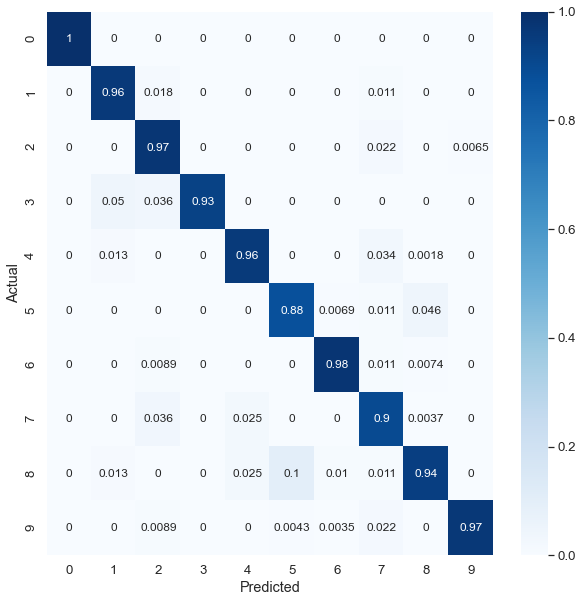

In [40]:
print('Number of training examples : ', len(X_train_over))
print('Number of testing examples : ', len(X_test),'\n\n')



svm = SVC()

svm.fit(X_train_over, Y_train_over)
pred = svm.predict(X_test_scaled)

print(classification_report(Y_test, pred))
print('Overall acurracy :', np.mean(Y_test==pred))


classes = np.unique(np.unique(Y_test))
conf_mat = pd.DataFrame(confusion_matrix(Y_test, pred), columns = classes, index = classes)
conf_mat.index.name = 'Actual'
conf_mat.columns.name = 'Predicted'

conf_mat/=np.sum(conf_mat,axis=1)
plt.figure(figsize = (10, 10))
sns.set(font_scale = 1.2)
sns.heatmap(conf_mat, cmap = "Blues", annot_kws = {"size": 12}, annot = True);

As for the random forest classifier, the svm classifier performs well when minority classes are upsampled. Again, the class n°7 is the least recognized. 

#### 2) Combining SMOTE and undersampling

Here, we aim to address the lowest classification performance witnessed on the class n°7. To this end, we will try to sample our data such that each class has the same number of instances as the class n°7. Therefore, some classes will have to be randomly downsampled, while others will be upsampled using SMOTE. As a reminder, we first plot the distribution of our different classes within our training set :

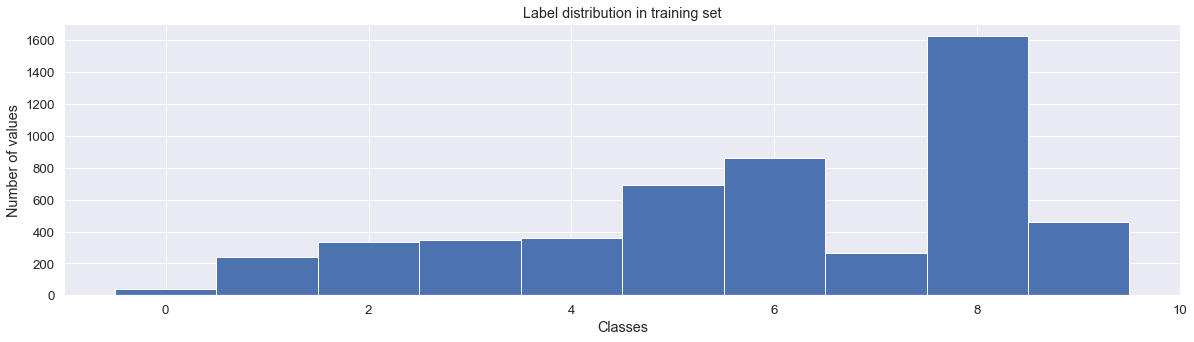

In [41]:
classes, counts = np.unique(Y_train, return_counts=True)

plt.figure(figsize=(20,5))
plt.title('Label distribution in training set')
plt.bar(classes, counts, align='center', width=1)
plt.xlabel('Classes')
plt.ylabel('Number of values')
plt.show()

We build a function that takes as input a number of instances with a target vector. It returns two dictionaries corresponding to the parameters that will be needed for the sampling functions :

In [42]:
def build_parameters(n_instances, Y):
    parameters_under = dict()
    parameters_over = dict()
    for element in dict(zip(*np.unique(Y, return_counts=True))).items():
        if element[1]<n_instances:
            parameters_under[element[0]] = n_instances
        elif element[1]>n_instances:
            parameters_over[element[0]] = n_instances
    return parameters_under, parameters_over

In [43]:
n_instances_7 = len(np.where(Y_train==7)[0])
print('Number of instances in the class n°7 :',n_instances_7)

Number of instances in the class n°7 : 268


We arbitrarily choose to downsample all of the classes down to 600 samples and upsample the class n°7 up to 1600 instances:

Upsampling function parameters :  {0: 600, 1: 600, 2: 600, 3: 600, 4: 600, 7: 600, 9: 600} 

Downsampling function parameters :  {5: 600, 6: 600, 8: 600} 

Choosen sampling strategy for class n°7 : 1600 

F1 weighted scores : LR: 0.897223 (0.013098)
Accuracy scores : LR: 0.908835 (0.011892)
Fit time : LR: 0.802368 (0.130977)
F1 weighted scores : SVM: 0.912728 (0.014103)
Accuracy scores : SVM: 0.924161 (0.014978)
Fit time : SVM: 1.218166 (0.104981)
F1 weighted scores : KNN: 0.837128 (0.014169)
Accuracy scores : KNN: 0.875688 (0.014037)
Fit time : KNN: 0.085228 (0.032150)
F1 weighted scores : RF: 0.934648 (0.011388)
Accuracy scores : RF: 0.940408 (0.015558)
Fit time : RF: 5.580037 (0.562622)


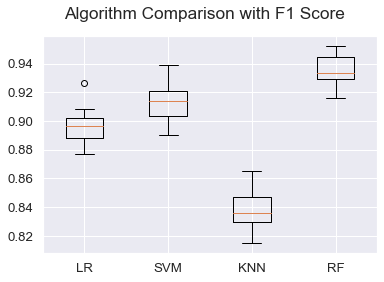

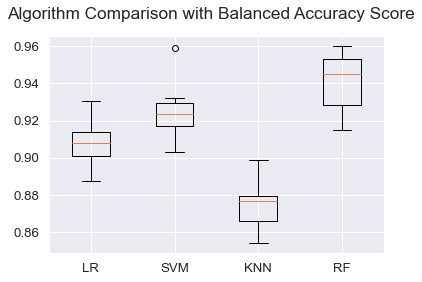

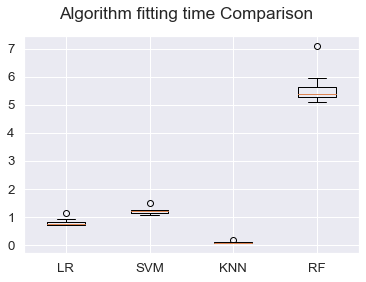

In [47]:
from imblearn.under_sampling import RandomUnderSampler

parameters_under, parameters_over = build_parameters(600, Y_train)

print('Upsampling function parameters : ', parameters_under,'\n')
print('Downsampling function parameters : ', parameters_over,'\n')

parameters_under[7]=1600

print('Choosen sampling strategy for class n°7 :',parameters_under[7],'\n')

models = []
models.append(('LR', LogisticRegression()))
models.append(('SVM', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier()))


results_f1 = []
results_acc = []
results_time = []
names = []
scoring = ['f1_weighted','balanced_accuracy']



i = 0
for name, model in models:
    scaler = MinMaxScaler()
    undersample = RandomUnderSampler(parameters_over)
    oversample = SMOTE(parameters_under)
    
    pipe = imblearn.pipeline.Pipeline(steps=[('scaler', scaler), 
                                             ('UpSampling', oversample),
                                             ('DownSampling', undersample),
                                             (name, model)])
    kfold = model_selection.KFold(n_splits=10, random_state=i, shuffle=True)
    cv_results = model_selection.cross_validate(pipe, X_train, Y_train, cv=kfold, scoring=scoring)
    
    results_f1.append(cv_results['test_f1_weighted'])
    results_acc.append(cv_results['test_balanced_accuracy'])
    results_time.append(cv_results['fit_time'])
    names.append(name)
    i+=1

    
    msg1 = "%s: %f (%f)" % (name, cv_results['test_f1_weighted'].mean(), cv_results['test_f1_weighted'].std())
    print('F1 weighted scores :',msg1)
    msg2 = "%s: %f (%f)" % (name, cv_results['test_balanced_accuracy'].mean(), cv_results['test_balanced_accuracy'].std())
    print('Accuracy scores :',msg2)
    msg3 = "%s: %f (%f)" % (name, cv_results['fit_time'].mean(), cv_results['fit_time'].std())
    print('Fit time :',msg3)
    

    
fig = plt.figure()
fig.suptitle('Algorithm Comparison with F1 Score')
ax = fig.add_subplot(111)
plt.boxplot(results_f1)
ax.set_xticklabels(names)
plt.show()


    
fig = plt.figure()
fig.suptitle('Algorithm Comparison with Balanced Accuracy Score')
ax = fig.add_subplot(111)
plt.boxplot(results_acc)
ax.set_xticklabels(names)
plt.show()


fig = plt.figure()
fig.suptitle('Algorithm fitting time Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_time)
ax.set_xticklabels(names)
plt.show()

We can see here that we have managed to improve the overall performance of our classifiers while using a smaller amount of data compared to the upsampling strategy alone. The class n°7 is better classified, but this result is detrimental to other classes that are less recognized than after our previous experiment. We apply the same pipeline to the whole training set : 

In [48]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

undersample = RandomUnderSampler(parameters_over)
over = SMOTE(parameters_under)

X_combine, Y_combine = over.fit_resample(X_train_scaled, Y_train)
X_combine, Y_combine = undersample.fit_resample(X_combine, Y_combine)

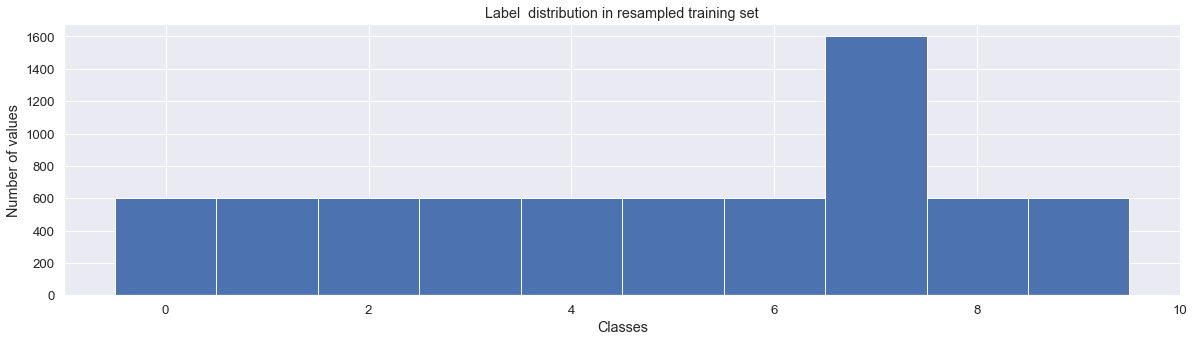

In [49]:
classes, counts = np.unique(Y_combine, return_counts=True)

plt.figure(figsize=(20,5))
plt.title('Label  distribution in resampled training set')
plt.bar(classes, counts, align='center', width=1)
plt.xlabel('Classes')
plt.ylabel('Number of values')
plt.show()

In [50]:
print('Number of training examples : ', len(X_combine))
print('Number of testing examples : ', len(X_test),'\n\n')

rf = RandomForestClassifier()

rf.fit(X_combine, Y_combine)
pred = rf.predict(X_test_scaled)

print(classification_report(Y_test, pred))
print('Overall acurracy :', np.mean(Y_test==pred))

Number of training examples :  7000
Number of testing examples :  1745 


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.91      0.90      0.91        80
           2       0.94      0.92      0.93       112
           3       0.92      0.92      0.92       117
           4       0.97      0.98      0.97       121
           5       0.91      0.92      0.91       231
           6       0.96      0.99      0.98       288
           7       0.89      0.87      0.88        89
           8       0.95      0.94      0.95       541
           9       0.98      0.97      0.98       154

    accuracy                           0.94      1745
   macro avg       0.94      0.94      0.94      1745
weighted avg       0.94      0.94      0.94      1745

Overall acurracy : 0.9438395415472779


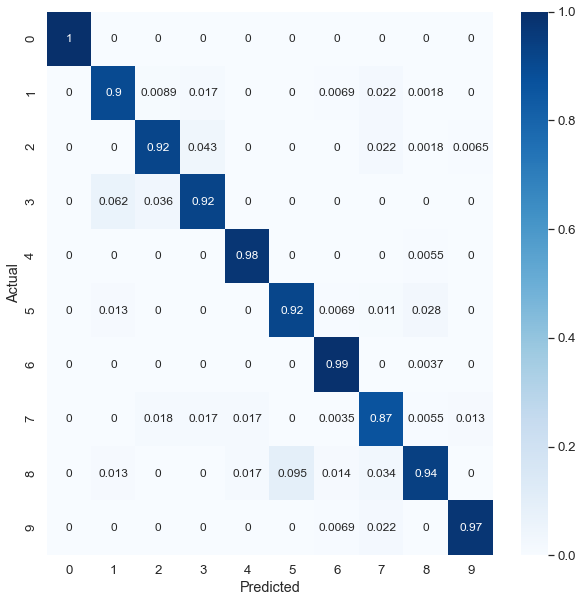

In [51]:
classes = np.unique(np.unique(Y_test))
conf_mat = pd.DataFrame(confusion_matrix(Y_test, pred), columns = classes, index = classes)
conf_mat.index.name = 'Actual'
conf_mat.columns.name = 'Predicted'
#for i in range(len(conf_mat)):
conf_mat/=np.sum(conf_mat,axis=1)
plt.figure(figsize = (10, 10))
sns.set(font_scale = 1.2)
sns.heatmap(conf_mat, cmap = "Blues", annot_kws = {"size": 12}, annot = True);

We can see that we have improved the classification accuracy on the class n°7 with this sampling strategy. 

# Additional Test

Here, we just perform one additional test using an SVM that we combine with a PCA and an upsampling strategy. We want to see how much we can improve the performance of this classifier by ajdusting the computation time that is added by the upsampling strategy and the one that is suppressed by the dimensionality reduction implied by PCA: 

F1 weighted scores : SVM: 0.940620 (0.006722)
Accuracy scores : SVM: 0.944879 (0.009523)
Fit time : SVM: 2.609468 (0.307447)


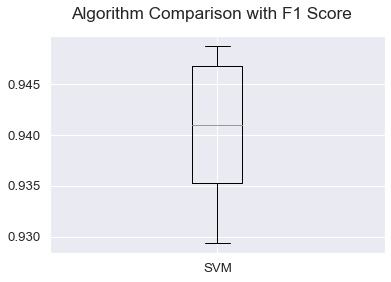

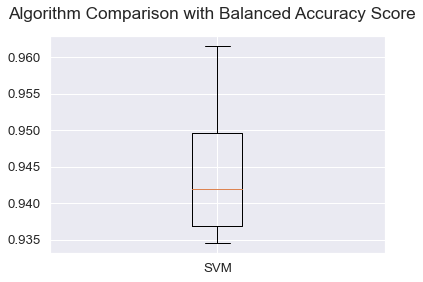

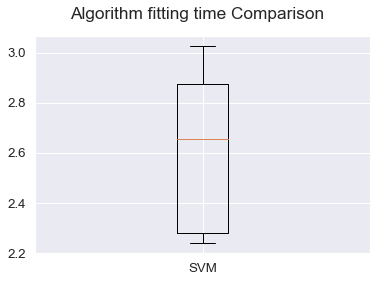

In [52]:
from imblearn.under_sampling import RandomUnderSampler


models = []
models.append(('SVM', SVC()))

results_f1 = []
results_acc = []
results_time = []
names = []
scoring = ['f1_weighted','balanced_accuracy']



i = 0
for name, model in models:
    scaler = MinMaxScaler()
    pca = PCA(n_components=40)
    #undersample = RandomUnderSampler(parameters_over)
    oversample = SMOTE()
    
    pipe = imblearn.pipeline.Pipeline(steps=[('scaler', scaler), 
                                             ('pca', pca),
                                             ('UpSampling', oversample),
                                             (name, model)])
    kfold = model_selection.KFold(n_splits=10, random_state=i, shuffle=True)
    cv_results = model_selection.cross_validate(pipe, X_train, Y_train, cv=kfold, scoring=scoring)
    
    results_f1.append(cv_results['test_f1_weighted'])
    results_acc.append(cv_results['test_balanced_accuracy'])
    results_time.append(cv_results['fit_time'])
    names.append(name)
    i+=1

    
    msg1 = "%s: %f (%f)" % (name, cv_results['test_f1_weighted'].mean(), cv_results['test_f1_weighted'].std())
    print('F1 weighted scores :',msg1)
    msg2 = "%s: %f (%f)" % (name, cv_results['test_balanced_accuracy'].mean(), cv_results['test_balanced_accuracy'].std())
    print('Accuracy scores :',msg2)
    msg3 = "%s: %f (%f)" % (name, cv_results['fit_time'].mean(), cv_results['fit_time'].std())
    print('Fit time :',msg3)
    

    
fig = plt.figure()
fig.suptitle('Algorithm Comparison with F1 Score')
ax = fig.add_subplot(111)
plt.boxplot(results_f1)
ax.set_xticklabels(names)
plt.show()


    
fig = plt.figure()
fig.suptitle('Algorithm Comparison with Balanced Accuracy Score')
ax = fig.add_subplot(111)
plt.boxplot(results_acc)
ax.set_xticklabels(names)
plt.show()


fig = plt.figure()
fig.suptitle('Algorithm fitting time Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_time)
ax.set_xticklabels(names)
plt.show()

Here, we intuitively conclude that the accuracy has not significantly been degraded when reducing the number of features with the PCA, simultaneously, we can see that the computation time has been reduced. We carry out a simple t-test to asses whether the difference of values is significant or not : 

In [53]:
from scipy.stats import t
from math import sqrt

def t_test(mean_a, std_a, n_a, mean_b, std_b, n_b):
    se_1 = std_a/ sqrt(n_a)
    se_2 = std_b / sqrt(n_b)
    sed_ = sqrt(se_1**2 + se_2**2)
    t_stat = (mean_a - mean_b) / sed_
    df = n_a + n_b - 2
    alpha = 0.05
    cv = t.ppf(1.0 - alpha, df)
    p = (1 - t.cdf(abs(t_stat), df)) * 2
    if p > alpha:
        print('Accept null hypothesis that the means are equal.')
    else:
        print('Reject the null hypothesis that the means are equal.')

- Results from SVM with upsampling alone : 
    - Accuracy : mean = 0.939197 ; std = 0.012432
    - Fit time : mean = 4.034961 ; std = 0.462554
    
- Results from SVM with PCA + upsampling : 
    - Accuracy : mean = 0.944879 ; std = 0.009523
    - Fit time : mean = 2.609468 ; std = 0.307447

In [58]:
print('T-test on the accuracy difference :\n')
t_test(0.939197, 0.012432, 10, 0.944879, 0.009523, 10)

T-test on the accuracy difference :

Accept null hypothesis that the means are equal.


In [59]:
print('T-test on the computation time difference :\n')
t_test(4.034961, 0.462554, 10, 2.609468, 0.307447, 10)

T-test on the computation time difference :

Reject the null hypothesis that the means are equal.


This simple analysis shows us that it is possible to find a relevant combination of upsampling and dimensionality reduction in order to reduce the training's computational cost while conserving a decent performance.  

# Conclusion 



### Overall results
In this notebook, we have studied a problem of imbalanced stroke classification using different learning algorithms, sampling strategies and feature selection techniques. To have an evaluation process that was as relevant as possible, we used a 10-fold cross validation for all the experiments we carried out, by keeping an independent testing set on the side to check our partitioning method's consistency.  

### Influence of the classifiers 
Throughout our experiments, we have seen that classifiers of different natures respond differently to elements such as data imbalance, sampling strategies and more generally, the nature of the data. It is hard to state which classifier is the most suited for this particular problem, even though we usually observed that the best results were achieved by the random forest model. 

### Influence of the feature selection algorithm
We chose to compare two feature selection techniques that were inherently different. One was based on the direct influence of features on the target variables (ANOVA-based), the other one was based on maximizing the variance whithin the data without taking class information into account (PCA). We saw that each of these techniques had its own influence on the different classifiers. For example, the ANOVA-based method degraded the regression based model, while the PCA decreased the random forest performance. Here again, it is hard to strictly make a decision on which one of these methods is the most suited for this problem. However, we also noticed that both of these methods drastically decreased the computation time as the number of features selected got smaller. This highlights the tradeoff between performance and computational efficiency, especially present when a large number of features is available for a small amount of instances. 

### Influence of the sampling strategy
When dealing with an imbalanced dataset, we have seen during our experiments that using sampling strategies to harmonize the class representations is usually improving the final classification results. Here, we noticed that upsampling minority classes tends to yield good results. Again, the more we augment our data, the more ressources will be needed to train and evaluate our different classifiers. 

### Classifiers Hyperparameters tuning
In our experiments, we omitted one crucial step of the overall machine learning pipeline : the models' hyperparameters tuning step. Therefore, the results we obtained regarding each classifier might not represent their actual potential concerning this particular classification task. In a real world context, it would be advisable to tune these hyperparameters using a cross validation setting beforehand, then explore dimensionality reduction techniques and sampling strategies. 

### Sampling strategies parameters tuning
The same remark applies for the parameters of our sampling strategies. We illustrated each technique with arbitrary examples without looking for the optimal sampling strategy. For example, upsampling seemed to improve the overall accuracy, with some classes such as the n°7 that were still the least recognized. When combining upsampling and downsampling to over-represent this class, we saw that its classification results improved, while degrading the classification accuracy of other classes. Again, these parameters could be improved using a cross validation setting. 

### Final thoughts 
Our last additional test shows that combining an efficient sampling strategy with a dimensionality reduction technique can significantly improve the computational efficiency without degrading the performance. This may be done even more efficiently by tuning all the parameters we have mentionned in this conclusion. 